#### Our project is "Sentimental Analysis on Songs'Lyrics Data and Prediction of Genre" , we have used text cleaning technicks,

#### several machine learning and deep learning models and  in the end we wrote a script, running which you will be asked - in which

#### mood you are? The moods are labeled after haveing sentoment groupings and you should choose one of them. As you enter 

#### your mood it will get the highest sentiment value of that group,get the Song's name and open it on YouTube. 

### Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl


from textblob import TextBlob, Word
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
#import enchant
from langdetect import detect
from spellchecker import SpellChecker


import time 
import random

import re
from sklearn.naive_bayes import MultinomialNB 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression as ln


import requests
from scrapy.http import TextResponse
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By




from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Data preparing

In [77]:
data_1=pd.read_csv("data1.csv")
data_2=pd.read_csv("data2.csv")
data_3=pd.read_csv("data3.csv")
data_4=pd.read_csv("data4.csv")
data_5=pd.read_csv("data5.csv")

In [78]:
data_1.head()

,Artist,Name,Year,Popularity,genre,lyrics
0,Atif Aslam,Paniyon Sa Lyrics,2018,100.000000,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...",Jo tere laagi preet mohe\r\nRooh baar baar ter...
1,Atif Aslam,"O Saathi (From ""Baaghi 2"") Lyrics",2018,92.662551,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...","Kacchi doriyon, doriyon, doriyon se\r\nMainu t..."
2,Atif Aslam,Dil Diyan Gallan Lyrics,2017,91.854784,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...","Hmm...\r\nWoo...,Allah mujhe dard ke kaabil ba..."
3,Atif Aslam,Jab Koi Baat Lyrics,2018,88.245526,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...","Edited by hadiehama92,hmmhm hmmhm... hmmhm hmm..."
4,Atif Aslam,Jeena Jeena Lyrics,2015,87.891493,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...",Jab koi baat bigad jaaye\r\nJab koi mushkil pa...


#### Concatinating DataFrames

In [79]:
frames = [data_1, data_2, data_3,data_4,data_5]

In [80]:
for i in frames:
    print(i.columns) # here we notice that in column name "Year" there is a space,which rise a problem during concatenating

Index(['Artist', 'Name', 'Year', 'Popularity', 'genre', 'lyrics'], dtype='object')
Index(['Artist', 'Name', 'Year ', 'Popularity', 'genre', 'lyrics'], dtype='object')
Index(['Artist', 'Name', 'Year ', 'Popularity', 'genre', 'lyrics'], dtype='object')
Index(['Artist', 'Name', 'Year ', 'Popularity', 'genre', 'lyrics'], dtype='object')
Index(['Artist', 'Name', 'Year ', 'Popularity', 'genre', 'lyrics'], dtype='object')


In [81]:
for i in frames:
    if i.columns[2]=="Year ":
        i=i.rename(columns={'Year ': 'Year'},inplace=True)

In [82]:
full_data = pd.concat(frames,ignore_index=True)

In [83]:
full_data.columns

Index(['Artist', 'Name', 'Year', 'Popularity', 'genre', 'lyrics'], dtype='object')

In [84]:
full_data.head()

,Artist,Name,Year,Popularity,genre,lyrics
0,Atif Aslam,Paniyon Sa Lyrics,2018,100.000000,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...",Jo tere laagi preet mohe\r\nRooh baar baar ter...
1,Atif Aslam,"O Saathi (From ""Baaghi 2"") Lyrics",2018,92.662551,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...","Kacchi doriyon, doriyon, doriyon se\r\nMainu t..."
2,Atif Aslam,Dil Diyan Gallan Lyrics,2017,91.854784,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...","Hmm...\r\nWoo...,Allah mujhe dard ke kaabil ba..."
3,Atif Aslam,Jab Koi Baat Lyrics,2018,88.245526,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...","Edited by hadiehama92,hmmhm hmmhm... hmmhm hmm..."
4,Atif Aslam,Jeena Jeena Lyrics,2015,87.891493,"""tag"",""Rock"").setTargeting(""cid"",""1165686056"")...",Jab koi baat bigad jaaye\r\nJab koi mushkil pa...


In [85]:
full_data.shape

(8044, 6)

## Feature Engineering

#### As our data is mainly texts we did feature engineering first than EDA

In [86]:
full_data.drop_duplicates(subset =["Artist","Name"],inplace=True)# to drop dupliactes we took into considerisation Artist's 
                                                                   #  and song's names

In [87]:
full_data.isna().any() # as we see we have Na s in lyrics, so we dropped them too

Artist        False
Name          False
Year          False
Popularity    False
genre         False
lyrics         True
dtype: bool

In [88]:
len(full_data)

7828

In [89]:
full_data.dropna(inplace=True)
len(full_data)

7444

In [90]:
z=[]   # cleaning column Genre
for i in full_data.genre:
    z.append(re.findall(r'\w+',i)[1])

In [91]:
full_data.genre=z

In [92]:
full_data.genre.value_counts()

Rock            2438
Pop             2338
HipHop           848
Other            610
Country          432
setTargeting     398
Jazz             180
RB                71
Indie             66
Electronic        38
Folk              25
Name: genre, dtype: int64

In [93]:
full_data.genre=full_data.genre.apply(lambda x: x.replace('setTargeting','Other'))# the unknown genre is set as "Other"

In [94]:
full_data.head()

,Artist,Name,Year,Popularity,genre,lyrics
0,Atif Aslam,Paniyon Sa Lyrics,2018,100.000000,Rock,Jo tere laagi preet mohe\r\nRooh baar baar ter...
1,Atif Aslam,"O Saathi (From ""Baaghi 2"") Lyrics",2018,92.662551,Rock,"Kacchi doriyon, doriyon, doriyon se\r\nMainu t..."
2,Atif Aslam,Dil Diyan Gallan Lyrics,2017,91.854784,Rock,"Hmm...\r\nWoo...,Allah mujhe dard ke kaabil ba..."
3,Atif Aslam,Jab Koi Baat Lyrics,2018,88.245526,Rock,"Edited by hadiehama92,hmmhm hmmhm... hmmhm hmm..."
4,Atif Aslam,Jeena Jeena Lyrics,2015,87.891493,Rock,Jab koi baat bigad jaaye\r\nJab koi mushkil pa...


In [95]:
without_lryrics=[]   # drop word Lyrics from Name column values
for i in full_data.Name:
    without_lryrics.append(i[:-7])
full_data.Name=without_lryrics    

In [96]:
full_data.Name.head()

0                    Paniyon Sa
1    O Saathi (From "Baaghi 2")
2              Dil Diyan Gallan
3                  Jab Koi Baat
4                   Jeena Jeena
Name: Name, dtype: object

### Text cleaning part

In [97]:
def clean_text(text):
    tokens = word_tokenize(text)
# convert to lower case
    tokens = [w.lower() for w in tokens]
# remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
# filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
# stemming the words, keeping only rooths
    #porter = PorterStemmer()
    #words = [porter.stem(word) for word in words] # we can use both stemming or lemmatizing, here I used lemmatizing 
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w,"v") for w in words] # lemmatizing verbs then nouns
    words = ' '.join([lemmatizer.lemmatize(w) for w in words])
    return words

In [98]:
z=[]
for i in full_data.lyrics:
     z.append(clean_text(i))

In [99]:
full_data.lyrics=z

In [100]:
full_data.lyrics

0       jo tere laagi preet mohe rooh baar baar tera n...
1       kacchi doriyon doriyon doriyon se mainu tu baa...
2       hmm woo allah mujhe dard ke kaabil bana diya t...
3       edit hmmhm hmmhm hmmhm hmmm hmmhm hmmhm hmmhm ...
4       jab koi baat bigad jaaye jab koi mushkil pad j...
                              ...                        
8039    nt mean end life know nt right ca nt even slee...
8040    baby like style grip leg front way back way kn...
8041    send location let focus communicate cause need...
8042    say something give one want anywhere would fol...
8043    good enough since ive ooh aint aint noo gon na...
Name: lyrics, Length: 7444, dtype: object

In [110]:
indx=[]  # detecting non English sentences
try:
    for i in z:
        if detect(i)!='en':
            indx.append(z.index(i))
        else:
            pass
except:
    print(z.index(i)) 

6139


In [111]:
len(indx) # so we have 945 non english lyrics

945

In [112]:
indx.append(6139) # this string was empty after text cleaning so we also drop it

In [113]:
full_data.drop(full_data.index[indx],inplace=True) # dropping non English songs

In [114]:
len(full_data)

6554

In [115]:
## Define a function which will calculation sentiment score of each song's lyrics
def senti(x):
    return TextBlob(x).sentiment.polarity 
full_data["Polarity"] = full_data.lyrics.apply(senti)

In [116]:
full_data["Sentiments"] = ['very good' if score >= 0.5 
                             else 'good' if 0.5 > score > 0 
                                 else 'very bad' if score <= -0.5
                                    else 'bad' if 0 > score > -0.5
                                       else 'neutral' 
                                     for score in full_data.Polarity]

In [118]:
full_data.tail()

,Artist,Name,Year,Popularity,genre,lyrics,Polarity,Sentiments
8039,Zhavia,Man Down (The Four Performance),2018,47.647157,Pop,nt mean end life know nt right ca nt even slee...,-0.086407,bad
8040,Zhavia,One Dance (The Four Performance),2018,38.470140,Pop,baby like style grip leg front way back way kn...,0.080769,good
8041,Zhavia,Location (The Four Performance),2018,33.271205,Pop,send location let focus communicate cause need...,0.115025,good
8042,Zhavia,Say Something (The Four Performance),2018,26.999834,Pop,say something give one want anywhere would fol...,-0.050000,bad
8043,Zhavia,Unforgettable (The Four Performance),2018,19.235070,Pop,good enough since ive ooh aint aint noo gon na...,0.177688,good


# Explanatory Data Analysis

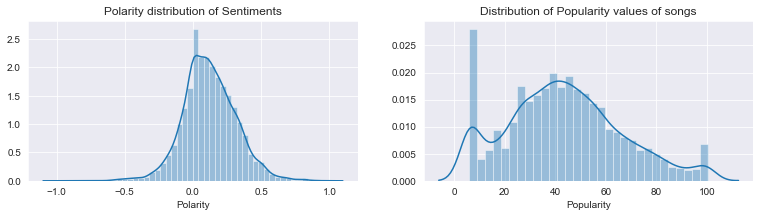

In [345]:
plt.figure(figsize=(13,10))
plt.title("lower right")

plt.subplot(3,2,1)
sns.distplot(full_data.Polarity)
plt.title("Polarity distribution of Sentiments")

plt.subplot(3,2,2)
sns.distplot(full_data.Popularity)
plt.title("Distribution of Popularity values of songs")

plt.show()

C:\Users\arman\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\arman\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


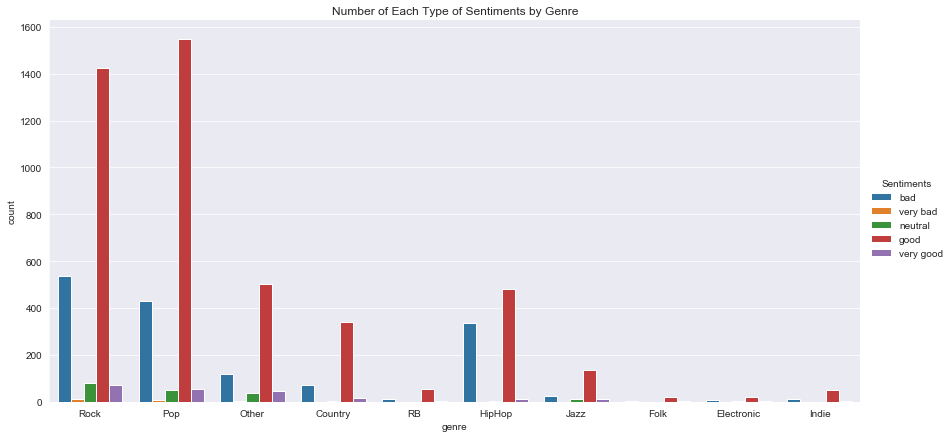

In [346]:

sns.factorplot(x="genre", hue="Sentiments", 
                    data=full_data, kind="count",
                       size=6, aspect=2).set(title = 'Number of Each Type of Sentiments by Genre')

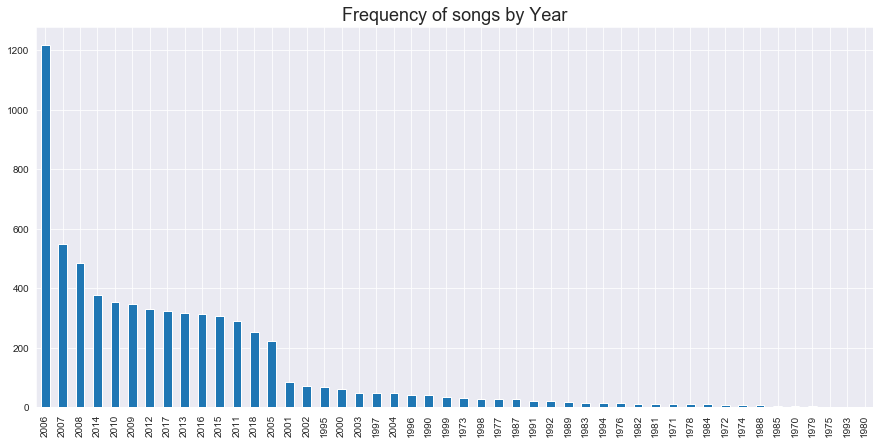

In [347]:
plt.figure(figsize=(15,7))
plt.title('Frequency of songs by Year',fontsize=18)
full_data.Year.value_counts().plot(kind='bar')

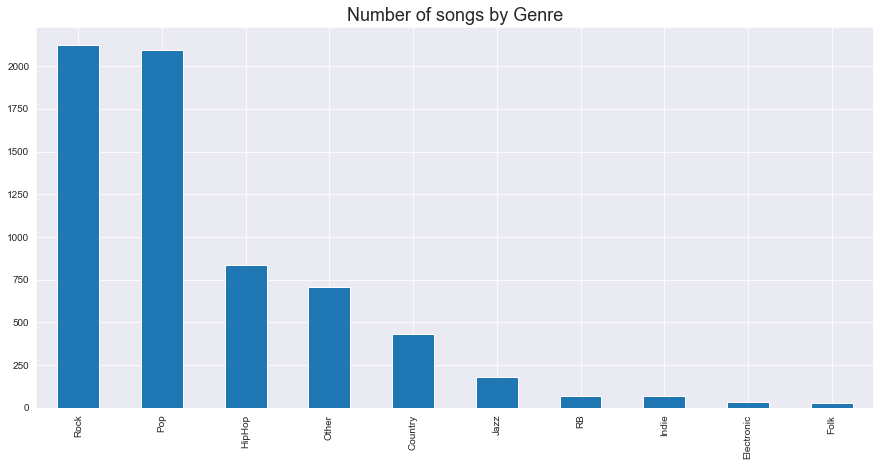

In [348]:
plt.figure(figsize=(15,7))
plt.title('Number of songs by Genre',fontsize=18)
full_data.genre.value_counts().plot(kind='bar')

In [34]:
by_genre = full_data.groupby('genre')['lyrics'].sum()
by_genre_df = pd.DataFrame(by_genre)
genre_counts = full_data['genre'].value_counts()
indices = by_genre_df.index
genre_counts = genre_counts.reindex(indices)
by_genre_df['genre_count'] = genre_counts.values
by_genre_df.head()
lyrics_split = full_data['lyrics'].apply(lambda x: x.split())
full_data['lyrics'] = lyrics_split.apply(lambda x: set(x))
full_data['lyrics'] = full_data['lyrics'].apply(lambda x: " ".join(x))
by_lyrics_set = full_data.groupby('genre')['lyrics'].sum()
by_genre_df['lyrics'] = by_lyrics_set

def make_word_list(lyrics):
    word_list = []
    lyrics=lyrics.split()
    for word in lyrics:
        word_list.append(word)
    return word_list
def list_to_set(word_list):
    return set(word_list)
def return_length(words):
    return len(words)

genre_detailed = by_genre_df
by_genre_df['word_lists'] = by_genre_df['lyrics'].apply(make_word_list)
by_genre_df['word_sets'] = by_genre_df['word_lists'].apply(list_to_set)
genre_detailed['total_words'] = genre_detailed['word_lists'].apply(return_length)
genre_detailed['total_unique_words'] = genre_detailed['word_sets'].apply(return_length)
genre_detailed['average_total_words'] = genre_detailed['total_words']/genre_detailed['genre_count']
genre_detailed['average_unique_words'] = genre_detailed['total_unique_words']/genre_detailed['genre_count']

by_genre_df.head()

,lyrics,genre_count,word_lists,word_sets,total_words,total_unique_words,average_total_words,average_unique_words
genre,,,,,,,,
Country,shoot hang home mind drink burn heart show bre...,429,"[shoot, hang, home, mind, drink, burn, heart, ...","{usesmilin, find, seal, tomorrow, clarity, sil...",26007,4308,60.622378,10.041958
Electronic,million anybody ohwoah miracle fool verse neve...,36,"[million, anybody, ohwoah, miracle, fool, vers...","{fade, anybody, find, really, tomorrow, look, ...",1565,599,43.472222,16.638889
Folk,barrel captain bed rusty belly hay long rise d...,25,"[barrel, captain, bed, rusty, belly, hay, long...","{fade, ireland, four, pushin, find, halifax, t...",1736,989,69.440000,39.560000
HipHop,body show deep bitch pink baby bust hair na le...,835,"[body, show, deep, bitch, pink, baby, bust, ha...","{eyesight, prince, spiral, nerve, copyin, betc...",124728,14821,149.374850,17.749701
Indie,fade countryman child ancestral old hurt stron...,66,"[fade, countryman, child, ancestral, old, hurt...","{fade, four, find, amaze, tomorrow, silence, s...",3006,1116,45.545455,16.909091


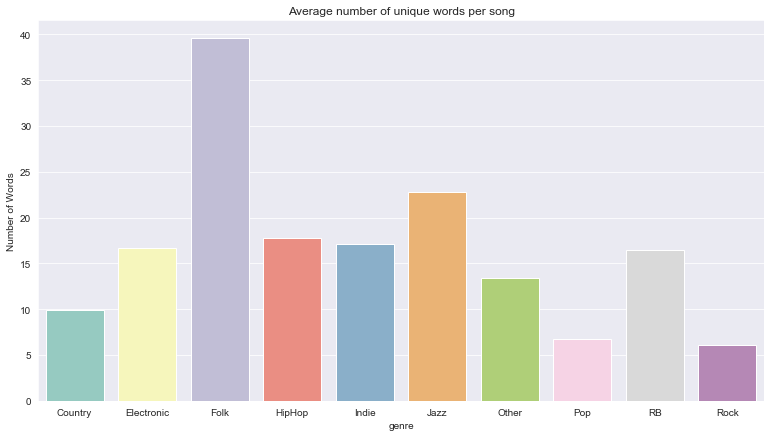

In [350]:
plt.figure(figsize=(13,7))
sns.barplot(x=genre_detailed.index, y=genre_detailed['average_unique_words'], palette="Set3")
sns.set_style('darkgrid')
plt.ylabel('Number of Words')
plt.title('Average number of unique words per song')
plt.show()

In [35]:
rock=" ".join(i for i in full_data[full_data["genre"]=="Rock"].lyrics)
pop = " ".join(i for i in full_data[full_data["genre"]=="Pop"].lyrics)
hiphop = " ".join(i for i in full_data[full_data["genre"]=="HipHop"].lyrics)
jazz = " ".join(i for i in full_data[full_data["genre"]=="Jazz"].lyrics)
country= " ".join(i for i in full_data[full_data["genre"]=="Country"].lyrics)
rb = " ".join(i for i in full_data[full_data["genre"]=="RB"].lyrics)

print ("There are {} words in the combination of all lyrics.".format(len(rock)))
print ("There are {} words in the combination of all lyrics.".format(len(pop)))
print ("There are {} words in the combination of all lyrics.".format(len(hiphop)))
print ("There are {} words in the combination of all lyrics.".format(len(jazz)))
print ("There are {} words in the combination of all lyrics.".format(len(country)))
print ("There are {} words in the combination of all lyrics.".format(len(rb)))

There are 686085 words in the combination of all lyrics.
There are 806602 words in the combination of all lyrics.
There are 731736 words in the combination of all lyrics.
There are 61066 words in the combination of all lyrics.
There are 150460 words in the combination of all lyrics.
There are 24300 words in the combination of all lyrics.


##  WordClouds 

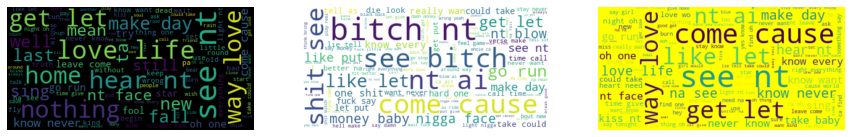

In [356]:

plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(rock)
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")

plt.subplot(2,3,2)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(hiphop)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.subplot(2,3,3)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="yellow").generate(pop)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

#### Here we see wordclouds for Rock, Hip-Hop and Pop music

# Frequency of words

In [36]:
Pop=TextBlob(str(pop))

In [37]:
freq=nltk.FreqDist(Pop.words)

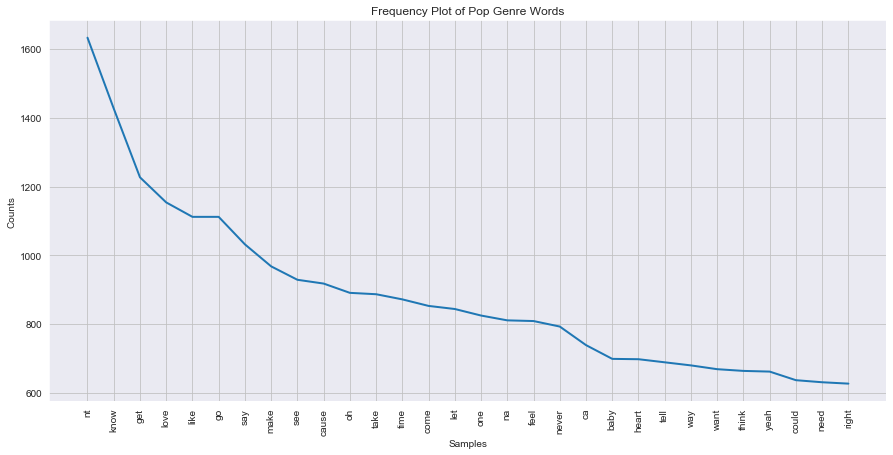

In [355]:
plt.figure(figsize=(15,7))
plt.title("Frequency Plot of Pop Genre Words")
freq.plot(30)

## Genre prediction by lyrics

### We should encode our genre column for input to models

In [61]:
encoder = LabelEncoder()

In [62]:
genres_encoded = encoder.fit_transform(full_data.genre)

In [63]:
genres_encoded

array([9, 9, 9, ..., 7, 7, 7])

In [75]:
def text_to_df(text):
    # takes text as a list an input
    # and conducts TF-IDF vectorization
    # outputs a DataFrame
    tf_idf = TfidfVectorizer()
    tfidf_matrix = tf_idf.fit_transform(text)
    words = tf_idf.get_feature_names()
    data = tfidf_matrix.toarray()
    df = pd.DataFrame(data,columns=words)
    return df

In [78]:
data=text_to_df(full_data.lyrics)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data, genres_encoded, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4925, 32181)
(1642, 32181)
(4925,)
(1642,)


## Models for Genre prediction

### Naive Bayes Classifier

In [94]:
alphas = [0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
p_grid_NB = {'alpha': alphas, 'fit_prior' : [True, False]}

model_nb = MultinomialNB()
grid = GridSearchCV(estimator = model_nb, param_grid = p_grid_NB, scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [44]:
model_nb=MultinomialNB(alpha=0.07,fit_prior=True)
model_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.07)

In [45]:
predicted_genre=model_nb.predict(X_test)
metrics.accuracy_score(y_test, predicted_genre)

0.5761266747868453

### RandomForestClassifier with GridSearch Cross Validation

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_depth= [20,40,60,80,100]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) # I have not run it for second time as it takes too long

In [46]:
model_rf=RandomForestClassifier(max_features="sqrt",n_estimators=1000,max_depth=40,random_state = 42) # best model

In [47]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=40, max_features='sqrt', n_estimators=1000,
                       random_state=42)

In [48]:
predicted_genre=model_rf.predict(X_test)
metrics.accuracy_score(y_test, predicted_genre)

0.6041412911084044

### Logistic Regression 

In [80]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [81]:
print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, model_logit.predict(X_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, model_logit.predict(X_test)))
print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, model_logit.predict(X_train)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, model_logit.predict(X_test)))

Logistic regression Train Accuracy ::  0.7591878172588833
Logistic regression Test Accuracy ::  0.6175395858708892
Multinomial Logistic regression Train Accuracy ::  0.7591878172588833
Multinomial Logistic regression Test Accuracy ::  0.6175395858708892


### Ridge classifier

In [118]:
from sklearn.linear_model import RidgeClassifier
model_ridge = RidgeClassifier().fit(X_train,y_train)

In [119]:
predicted_genre=model_ridge.predict(X_test)
metrics.accuracy_score(y_test, predicted_genre)

0.643727161997564

### Neural Network

In [94]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train.shape

(4925, 32181)

In [110]:
import sys

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers
from keras.datasets import cifar10
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import BatchNormalization

from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

from keras.optimizers import SGD

In [111]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 256, activation='relu',input_dim = 32181))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.7))

# Adding the second hidden layer
classifier.add(Dense(units = 128, activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 64, activation='relu'))
classifier.add(Dropout(0.3))

# Adding the output layer
classifier.add(Dense(units = 10, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

In [112]:
history=classifier.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
154/154 [==============================] - 15s 96ms/step - loss: 1.7960 - acc: 0.3456 - val_loss: 1.8101 - val_acc: 0.3441
Epoch 2/20
154/154 [==============================] - 12s 76ms/step - loss: 1.4813 - acc: 0.4270 - val_loss: 1.6068 - val_acc: 0.3971
Epoch 3/20
154/154 [==============================] - 11s 72ms/step - loss: 1.3485 - acc: 0.4871 - val_loss: 1.4197 - val_acc: 0.4848
Epoch 4/20
154/154 [==============================] - 11s 74ms/step - loss: 1.1740 - acc: 0.5561 - val_loss: 1.1735 - val_acc: 0.5889
Epoch 5/20
154/154 [==============================] - 11s 74ms/step - loss: 1.0119 - acc: 0.6441 - val_loss: 1.0540 - val_acc: 0.6267
Epoch 6/20
154/154 [==============================] - 11s 72ms/step - loss: 0.8398 - acc: 0.7135 - val_loss: 1.0849 - val_acc: 0.6358
Epoch 7/20
154/154 [==============================] - 11s 72ms/step - loss: 0.7181 - acc: 0.7604 - val_loss: 1.1491 - val_acc: 0.6431
Epoch 8/20
154/154 [==============================] - 11s 73ms

#### Accuracy of Models
#### Naive Bayes Classifier         - 0.57
#### Random Forest Classifier    - 0.60
#### Logistic Regression             - 0.61
#### Ridge Classifier                    - 0.643
#### Neural Networks                   - 0.6401

### As we see the best model is Ridge Classifier so we choosed it for prediction

### Write your lyrics and put type of the model you want to find the genre

In [113]:
def predict_topic(model,string):
    your_text=text_to_df([string])
    for i in  data.columns:
        if i not in your_text.columns:
            your_text[i]=0
    for i in your_text.columns:
        if i not in data.columns:
            del your_text[i]
    result=model.predict(your_text)
    result=encoder.inverse_transform(result)
    return result

In [121]:
predict_topic(model_ridge,"""Are you gunna you gunna you gunna you gunna rock my way
Oh are you gunna you gunna you gunna roll away
And are you
We won't get much sleep
You'll get tired
Of the people we meet
Let's just go away and hide
We can make it if we try
If we try
All I wanna know is, all I need to know is
Are you gunna you gunna you gunna you gunna rock my way
Are you gunna you gunna you gunna you gunna roll away
Oh the girls are so sweet
And you fall in love
Week after week
But let's get on all night
It will be the rise of your life
Of your life
All I wanna know is, allI need to know is
Are you gunna you gunna you gunna…""")

array(['Rock'], dtype=object)

### Find music by your mood on YouTube

In [122]:
df_grouped_by_sentiments=full_data.groupby('Sentiments').apply(pd.DataFrame.sort_values, 'Popularity',ascending=False)

### We have 5 mood categories - very good, good, neutral, bad , very bad. Please type one of them and you will enjoy music 

In [124]:
# opening browser
driver = webdriver.Chrome()
driver.maximize_window()

wait = WebDriverWait(driver, 3)
presence = EC.presence_of_element_located
visible = EC.visibility_of_element_located
# ask your mood
name = input("In which mood you are?")
answer=(df_grouped_by_sentiments[df_grouped_by_sentiments['Sentiments']==name][:10].sample()[["Artist","Name"]].values[0])
# Navigate to url with video being appended to search_query
driver.get("https://www.youtube.com/results?search_query=" + str(answer))
time.sleep(2)
# play the video
wait.until(visible((By.ID, "video-title")))
driver.find_element_by_id("video-title").click()